In [1]:
import numpy as np
import matplotlib .pyplot as plt
from sklearn.datasets import make_blobs

X dimension:  (100, 2)
y dimension:  (100, 1)


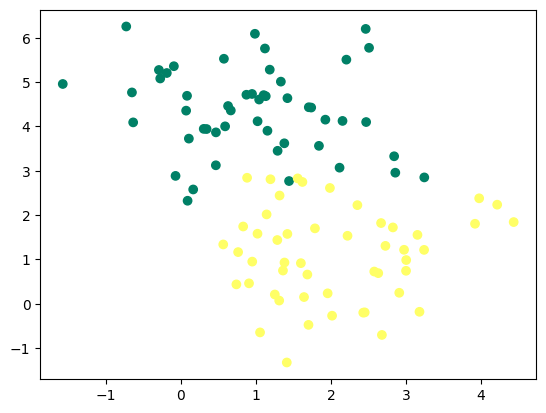

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))

print('X dimension: ', X.shape)
print('y dimension: ', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [3]:
def initialization(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

W, b = initialization(X)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1/(1+np.exp(-Z))
    return A

In [5]:
def log_loss(A, y):
    return (-1/len(y)) * np.sum(y * np.log(A) + (1-y) * np.log(1-A))

In [6]:
def gradients(A, X, y):
    dW = (1/len(y)) * np.dot(X.transpose(), A-y)
    db = (1/len(y)) * np.sum(A-y)
    return dW, db

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return W, b

In [8]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [9]:
from sklearn.metrics import accuracy_score

In [31]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    W, b = initialization(X)
    
    loss = []
    
    for i in range(n_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    y_pred = predict(X, W, b)
    accuracy = accuracy_score(y, y_pred)
    print(accuracy)
    
    plt.plot(loss)
    plt.show()
    
    return W, b

[[0.92443435]
 [0.88415864]
 [0.0080023 ]
 [0.26662016]
 [0.95244315]
 [0.38653674]
 [0.07423866]
 [0.89312711]
 [0.0610077 ]
 [0.93314359]
 [0.03610527]
 [0.91844342]
 [0.02044589]
 [0.02626977]
 [0.76494311]
 [0.96022409]
 [0.99118771]
 [0.05235381]
 [0.87256617]
 [0.75046454]
 [0.04100291]
 [0.04199946]
 [0.4625035 ]
 [0.00735783]
 [0.95565966]
 [0.03210173]
 [0.94575169]
 [0.0062975 ]
 [0.05428926]
 [0.7271743 ]
 [0.9841615 ]
 [0.04193222]
 [0.80920619]
 [0.98428686]
 [0.42828345]
 [0.16812682]
 [0.86117408]
 [0.54644304]
 [0.42799994]
 [0.65332538]
 [0.13500806]
 [0.03215611]
 [0.00124723]
 [0.16843814]
 [0.26562725]
 [0.85208378]
 [0.97965079]
 [0.97972476]
 [0.00874238]
 [0.00914184]
 [0.96021774]
 [0.73425414]
 [0.0182795 ]
 [0.03217447]
 [0.7151541 ]
 [0.03895389]
 [0.61453892]
 [0.88325424]
 [0.94129258]
 [0.99312886]
 [0.73829453]
 [0.13898723]
 [0.00654707]
 [0.92107477]
 [0.01066998]
 [0.39108885]
 [0.05838536]
 [0.49562174]
 [0.92372612]
 [0.24176204]
 [0.1892275 ]
 [0.95

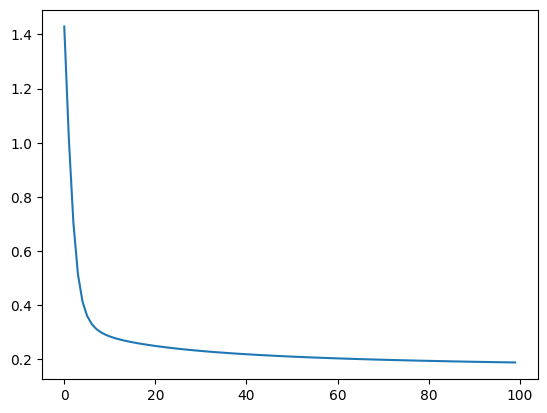

In [35]:
W, b = artificial_neuron(X, y)

In [36]:
W, b

(array([[ 0.82399216],
        [-1.2715822 ]]),
 array([1.86912468]))

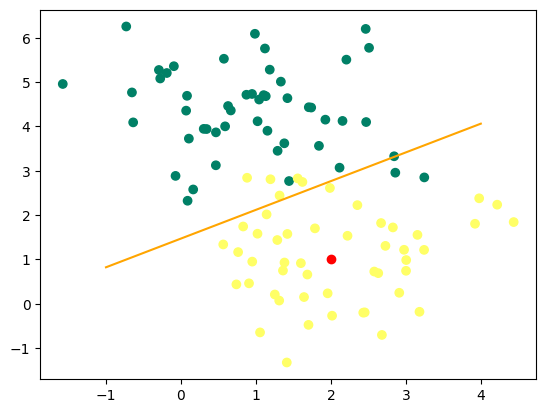

[0.90426399]


array([ True])

In [37]:
new_plant = np.array([2,1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0]*x0 - b) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='red')
plt.plot(x0, x1, c='orange')
plt.show()
predict(new_plant, W, b)